In [ ]:
# Retail Sales Performance Analysis
This notebook performs a comprehensive analysis of sales, profit, customer segments, regions, product categories, and shipping performance using the Superstore dataset. The goal is to identify trends, and top-performing products/customers.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [61]:
df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Dataset Overview
- The dataset contains sales orders for a retail store, including customer, product, order, and shipping information.
- Key columns: `Order Date`, `Ship Date`, `Category`, `Sub-Category`, `Sales`, `Profit`, `Customer Segment`, `Region`.
- We will perform exploratory data analysis, visualize trends, and derive insights.

In [62]:
# Dataset Info
df.info()

# Check missing values
df.isnull().sum()

# Remove duplicates
df = df.drop_duplicates()
print("Total rows after removing duplicates:", len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [63]:
# Convert dates
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Extract Year, Month, Month Name
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Month_Name"] = df["Order Date"].dt.month_name()

# Profit Margin %
df["Profit_Margin"] = (df["Profit"] / df["Sales"]) * 100

# Shipping Duration
df["Shipping_Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Name,Profit_Margin,Shipping_Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November,16.00,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November,30.00,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June,47.00,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October,-40.00,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October,11.25,7


In [ ]:
# Key Metrics
- Total Sales, Profit, Overall Profit Margin
- Average Discount
- Average Shipping Days

In [84]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
overall_profit_margin = (total_profit / total_sales) * 100
avg_discount = df["Discount"].mean()
avg_shipping_days = df["Shipping_Days"].mean()

print("Total Sales: $", round(total_sales,2))
print("Total Profit: $", round(total_profit,2))
print("Overall Profit Margin: ", round(overall_profit_margin,2), "%")
print("Average Discount: ", round(avg_discount*100,2), "%")
print("Average Shipping Days: ", round(avg_shipping_days,2))

Total Sales: $ 2297200.86
Total Profit: $ 286397.02
Overall Profit Margin:  12.47 %
Average Discount:  15.62 %
Average Shipping Days:  3.96


In [ ]:
#Sales, Profit & Profit Margin by Category
- Compare performance across product categories.
- Identify which categories are most profitable.

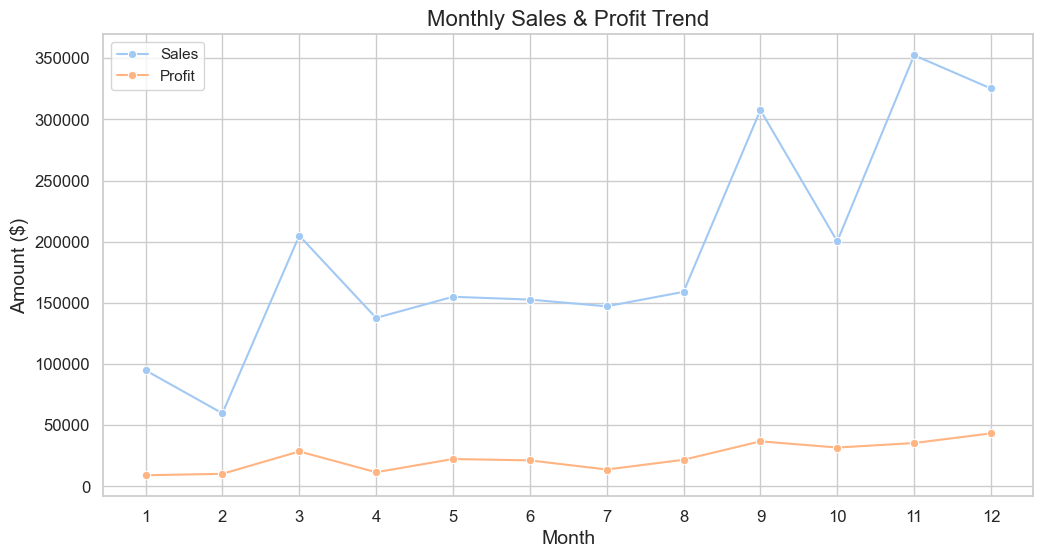

In [86]:
monthly_df = df.groupby("Month")[["Sales","Profit"]].sum().reset_index()

sns.lineplot(x="Month", y="Sales", data=monthly_df, marker="o", label="Sales")
sns.lineplot(x="Month", y="Profit", data=monthly_df, marker="o", label="Profit")
plt.title("Monthly Sales & Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.xticks(range(1,13))
plt.legend()
plt.show()

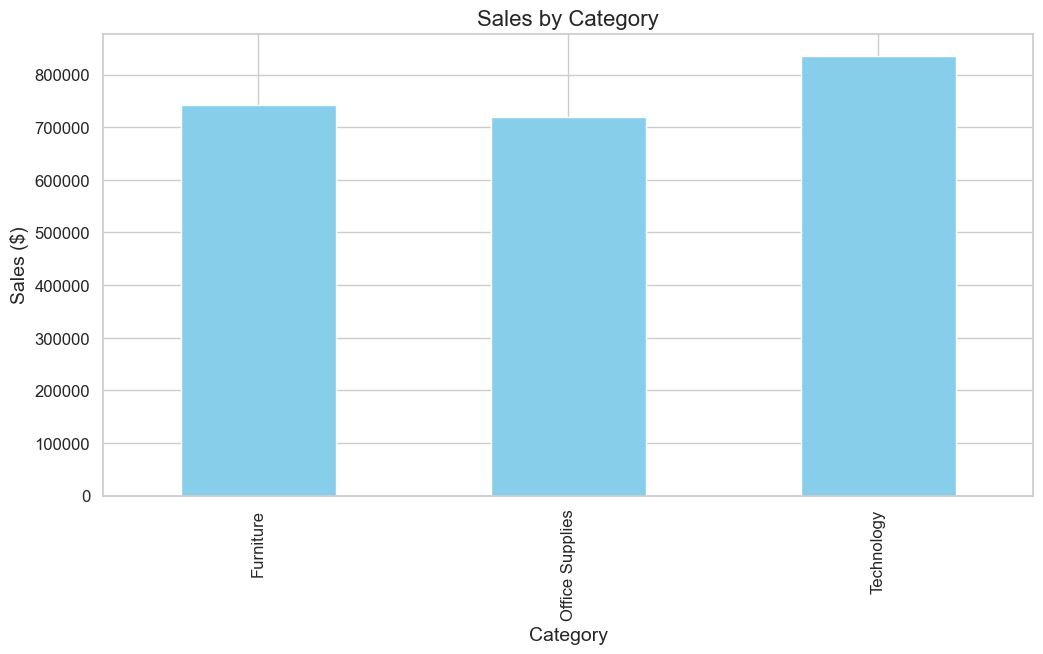

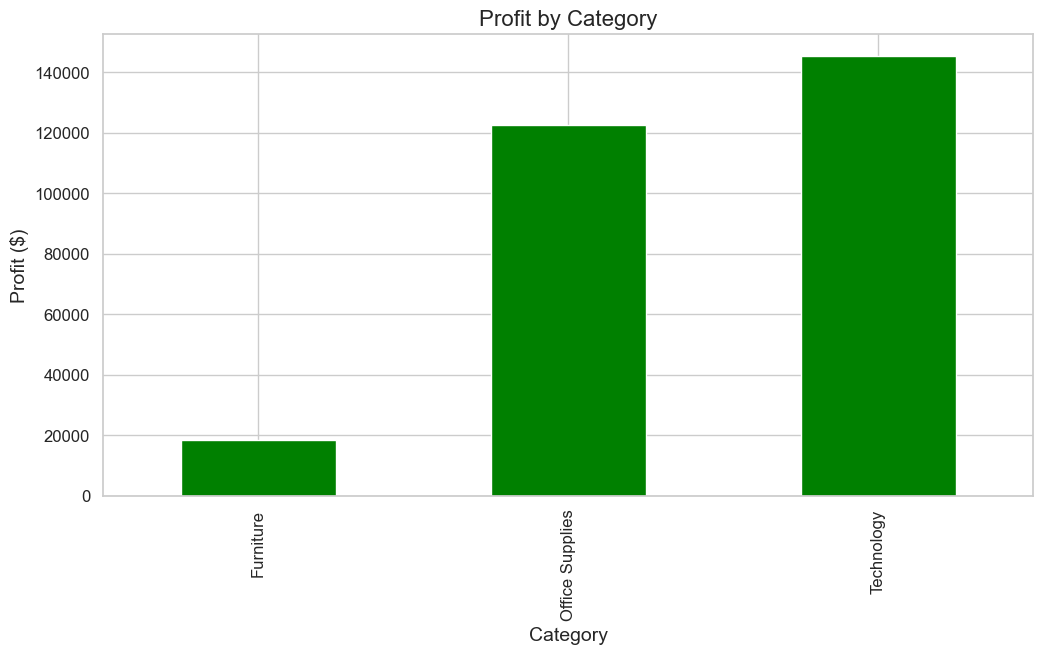

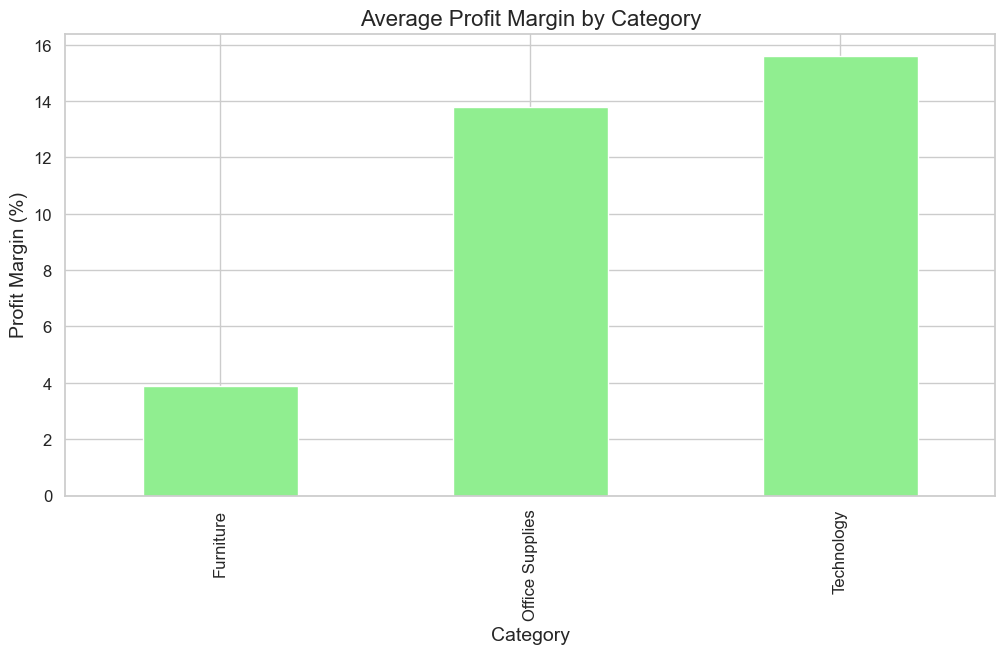

In [114]:

# Sales, Profit & Profit Margin by Category 

category_df = df.groupby("Category")[["Sales","Profit"]].sum().reset_index()
category_margin = df.groupby("Category")["Profit_Margin"].mean().reset_index()

# Sales
category_df.plot(
    kind="bar",
    x="Category",
    y="Sales",
    color="skyblue",
    legend=False
)
plt.title("Sales by Category")
plt.ylabel("Sales ($)")
plt.xlabel("Category")
plt.show()

# Profit
category_df.plot(
    kind="bar",
    x="Category",
    y="Profit",
    color="green",
    legend=False
)
plt.title("Profit by Category")
plt.ylabel("Profit ($)")
plt.xlabel("Category")
plt.show()

# Profit Margin
category_margin.plot(
    kind="bar",
    x="Category",
    y="Profit_Margin",
    color="lightgreen",
    legend=False
)
plt.title("Average Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Category")
plt.show()

In [ ]:
# Sales & Profit by Region
- Compare sales and profitability across regions.
- Identify regions with highest revenue and margins.

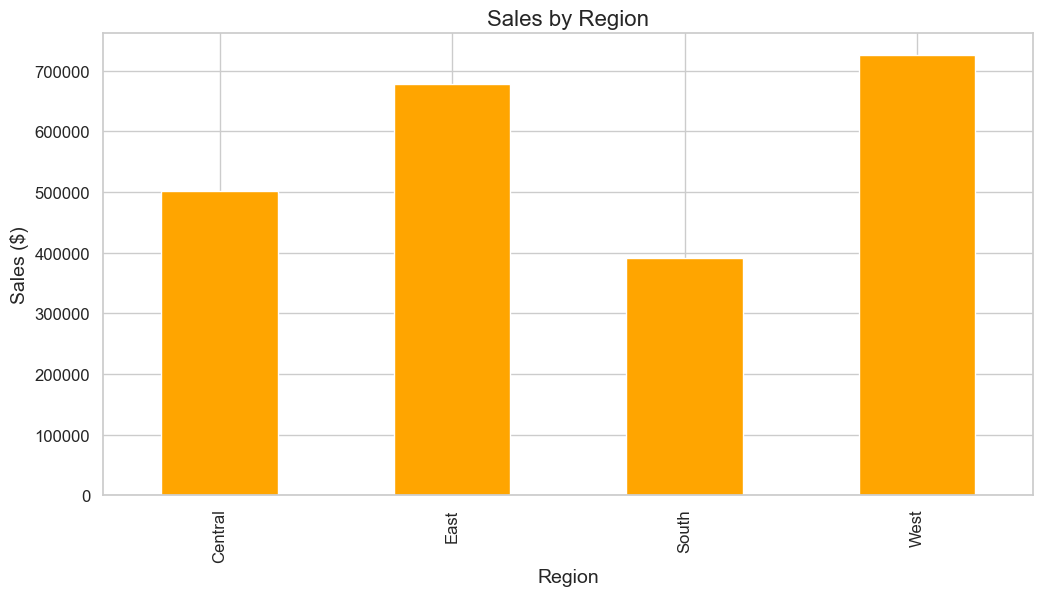

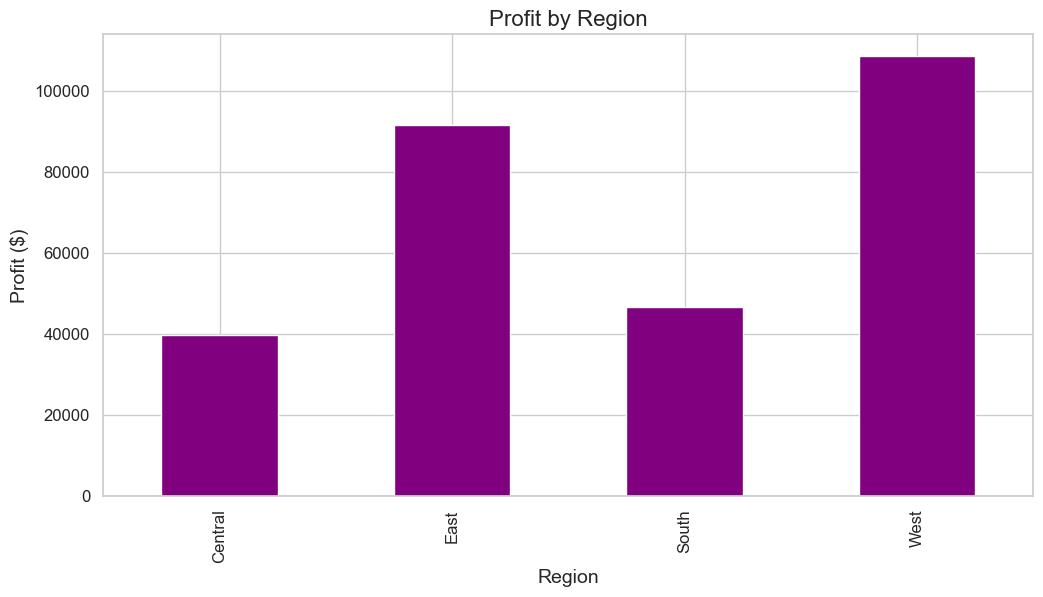

In [110]:

# Sales & Profit by Region 
region_df = df.groupby("Region")[["Sales","Profit"]].sum().reset_index()

# Sales
region_df.plot(
    kind="bar",
    x="Region",
    y="Sales",
    color="orange",
    legend=False
)
plt.title("Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.show()

# Profit
region_df.plot(
    kind="bar",
    x="Region",
    y="Profit",
    color="purple",
    legend=False
)
plt.title("Profit by Region")
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.show()

In [ ]:
# Customer Segment Analysis
- Compare sales and profit by customer segment.
- Identify most profitable segments.

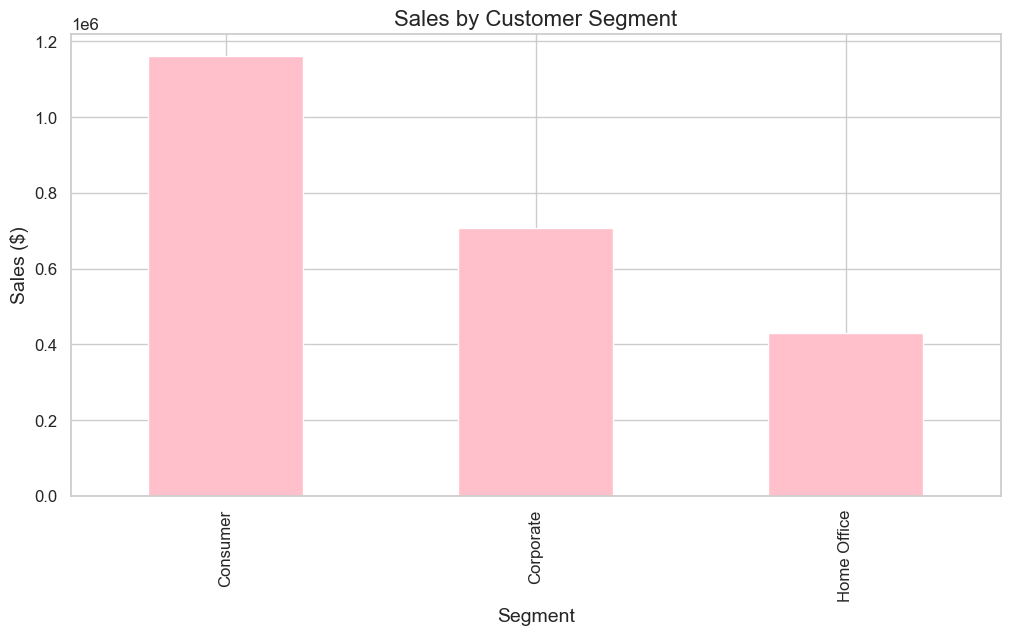

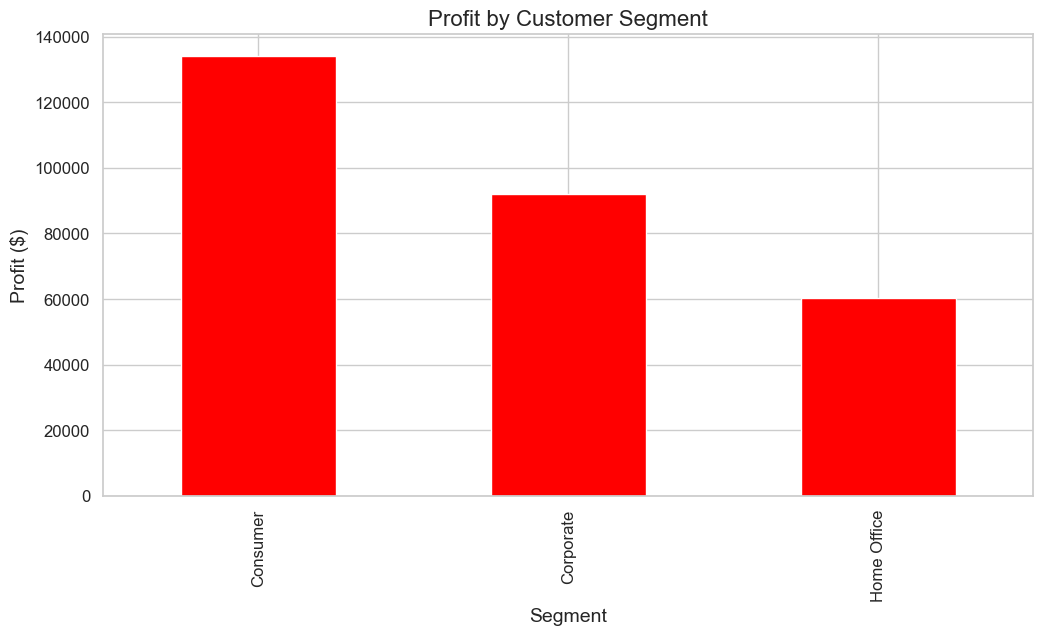

In [108]:

# Sales by Customer Segment

segment_df = df.groupby("Segment")[["Sales","Profit"]].sum().reset_index()

# Sales
segment_df.plot(
    kind="bar", 
    x="Segment", 
    y="Sales", 
    color="pink", 
    legend=False
)
plt.title("Sales by Customer Segment")
plt.ylabel("Sales ($)")
plt.xlabel("Segment")
plt.show()

# Profit
segment_df.plot(
    kind="bar", 
    x="Segment", 
    y="Profit", 
    color="red", 
    legend=False
)
plt.title("Profit by Customer Segment")
plt.ylabel("Profit ($)")
plt.xlabel("Segment")
plt.show()

In [ ]:
# Discount vs Profit
- Analyze how discounts affect profitability across categories.
- Bubble size represents Sales.

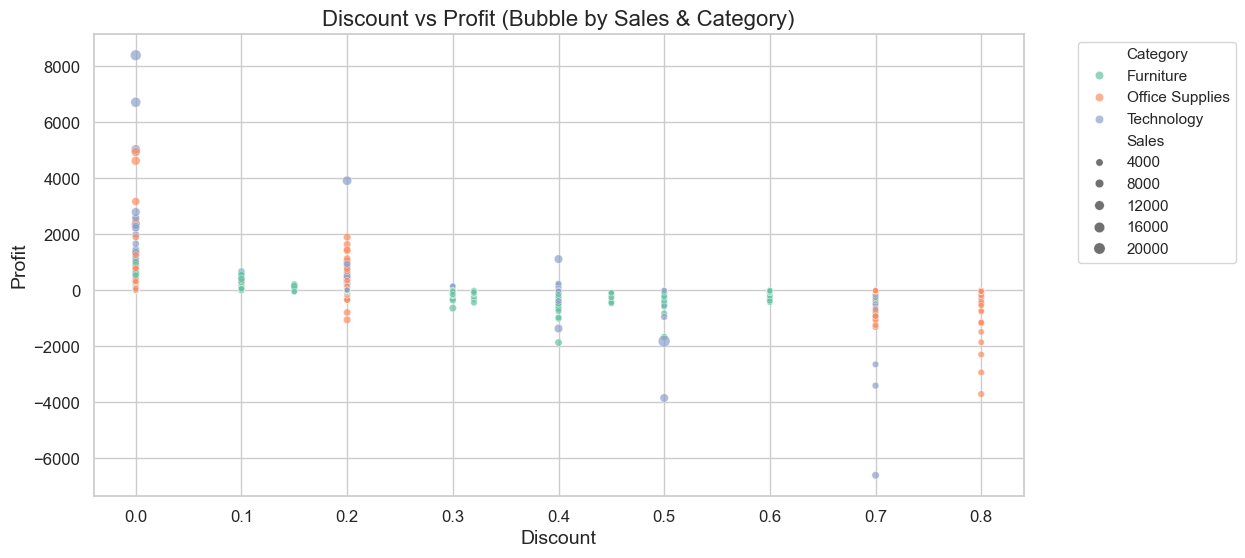

In [96]:
sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category", size="Sales", palette="Set2", alpha=0.7)
plt.title("Discount vs Profit (Bubble by Sales & Category)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.show()

In [ ]:
# Shipping Duration
- Distribution of shipping time in days.
- Identify potential delivery delays.

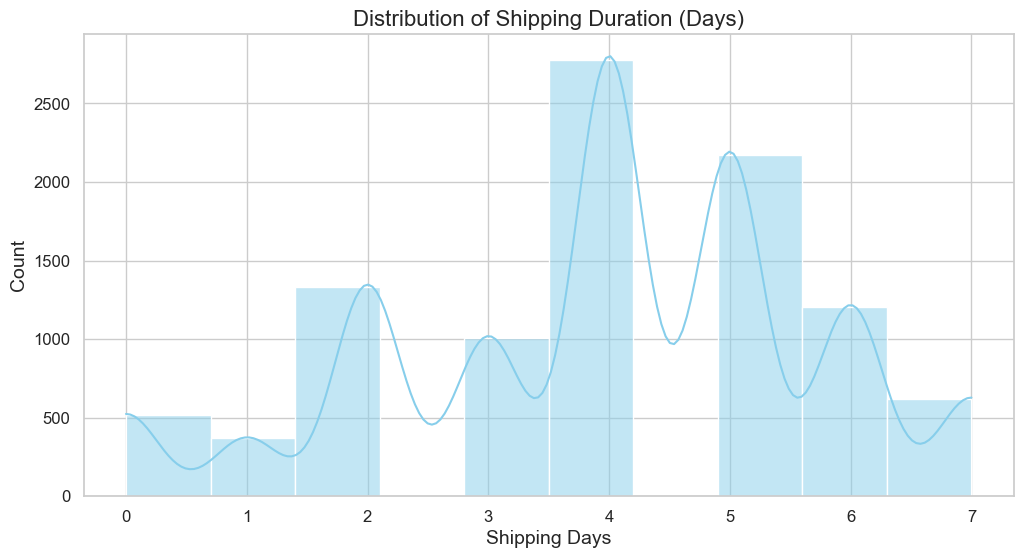

In [98]:
sns.histplot(df["Shipping_Days"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Shipping Duration (Days)")
plt.xlabel("Shipping Days")
plt.show()

In [ ]:
# Top 10 Products & Customers
- Identify top-performing products and customers based on profit.

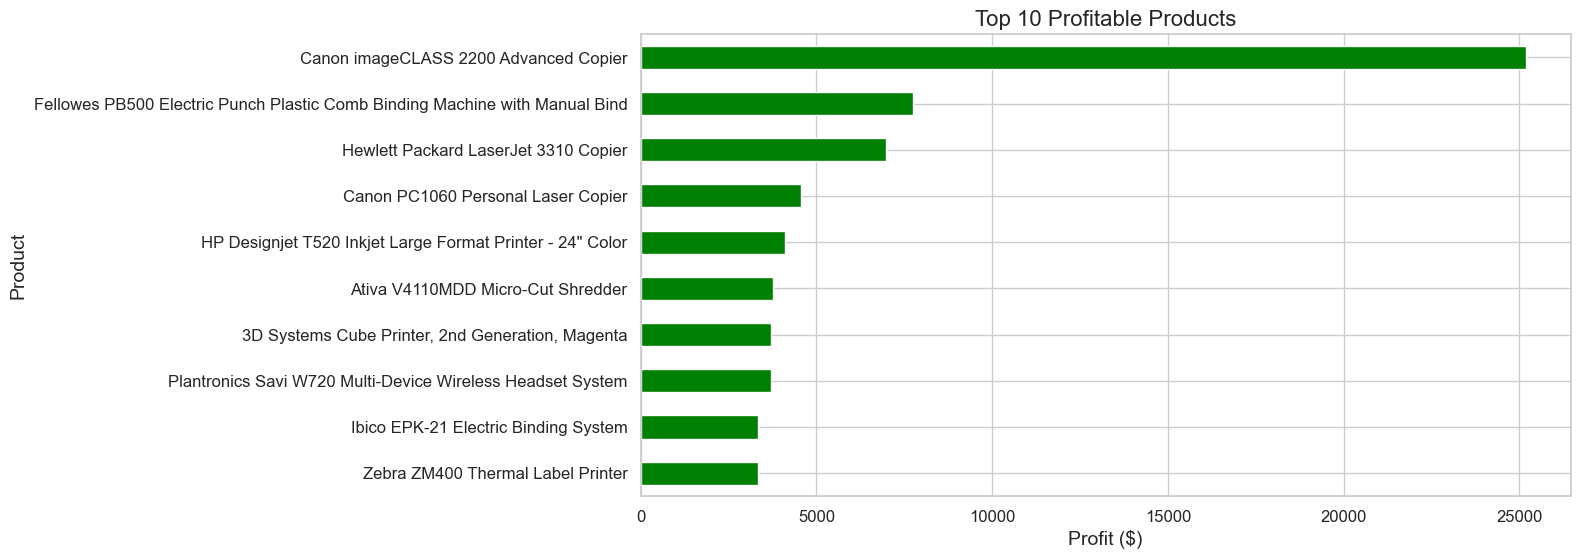

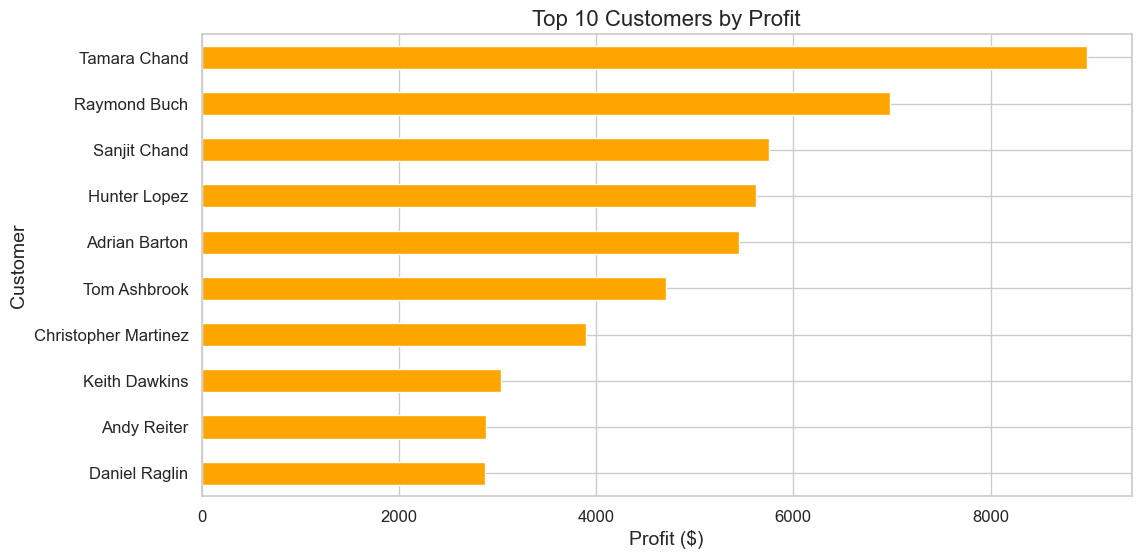

In [106]:
# Top 10 Products
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh", color="green")
plt.title("Top 10 Profitable Products")
plt.xlabel("Profit ($)")
plt.ylabel("Product")
plt.gca().invert_yaxis()  
plt.show()

# Top 10 Customers
top_customers = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind="barh", color="orange")
plt.title("Top 10 Customers by Profit")
plt.xlabel("Profit ($)")
plt.ylabel("Customer")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Correlation Heatmap
- Analyze relationships between Sales, Profit, Discount, Quantity, Profit Margin, and Shipping Days.

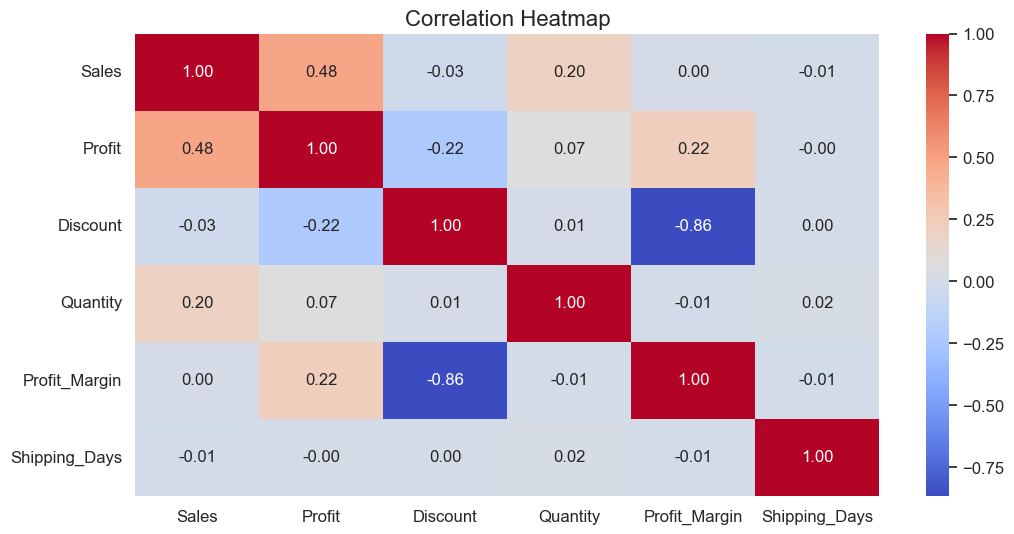

In [102]:
corr_cols = ["Sales","Profit","Discount","Quantity","Profit_Margin","Shipping_Days"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Key Business Insights
- **Technology** category generates highest profit and margin.
- **Furniture** has moderate sales but lower profitability.
- **West** region has highest revenue; Central region has lower margins.
- **Consumer** segment contributes most sales, Corporate segment has higher profitability.
- Higher discounts negatively affect profit.
- Average shipping duration is ~4–5 days; delays can affect satisfaction.
- Top 10 products generate majority of profits; focus on these for strategy.

In [ ]:
# Conclusion
This analysis identifies key revenue and profit drivers, highlighting top categories, customer segments, regions, products, and the impact of discounts and shipping performance.  
These insights can guide operational improvements, pricing strategies, and marketing focus to maximize profit and efficiency.